In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from scipy.stats import poisson
from tqdm.notebook import tqdm
%matplotlib inline

# 1. Continuous OU path simulation

In [3]:
# Define drift and diffusion terms of stochastic process

def drift(x,kappa,theta):
    
    return kappa*(theta-x)


def diff(x,sigma):
    
    return sigma
    

In [4]:
# Function for finite-horizon path simulation of jump OU process, with a given stopping value

def ou_sim_stopping(kappa, theta, sigma, dt, x_0, n_sim, stopping):
    
    T = 1.  # Total time.
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros(n)
    x[0] = x_0
    x_origin = x
    x_list = list()
    ruin_count = 0
    
    for j in range(n_sim):
        
        for i in range(n - 1):
            
            stopping_factor = 0.0 if ((isinstance(stopping, float)) and (x[i] <= stopping)) else 1.0
            
            dx = drift(x[i], kappa=kappa, theta=theta)*dt  + diff(x[i], sigma = sigma)*np.sqrt(dt)*np.random.randn()
            
            #if sigma**2 < kappa*(theta-x[i])*dx:
            #    print('Condition flag')
            
            x[i + 1] = x[i] + stopping_factor*(dx)
            
            
        #plt.plot(t, x, lw=1)
        x_list.append(x.copy())
        x = x_origin
        
        if stopping_factor == 0.0:
                ruin_count += 1
                
        stopping_factor = 1.0
        
    ruin_prob = ruin_count / n_sim    
    
    #plt.show()
        
    #X_tf = tf.stack(x_list)
    return x_list, ruin_prob

   

### Path simulation examples

In [1]:
# sigma = 0.5
# kappa = 0.3
# theta = 0.7
# dt = 0.01
# x_0 = 0.3
# n_sim = 1000

# ou = ou_sim_not_stopping(kappa = kappa, theta = theta, sigma = sigma, dt = dt, x_0 = x_0, n_sim = n_sim)

In [37]:
# sigma = 1.0
# kappa = 1.0
# theta = 0.5
# dt = 0.01
# x_0 = 0.3
# n_sim = 2

# ou = ou_sim_not_stopping(kappa = kappa, theta = theta, sigma = sigma, dt = dt, x_0 = x_0, n_sim = n_sim)

## 1a. Monte Carlo ruin probability estimations - Continuous OU

  0%|          | 0/1000 [00:00<?, ?it/s]

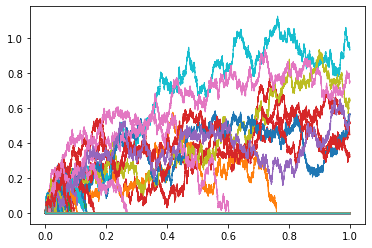

0.992


In [7]:
sigma = 0.5
kappa = 0.3
theta = 0.7
dt = 0.00001
x_0 = 0.003
n_sim =1000

ou, pds = ou_sim_stopping(kappa = kappa, theta = theta, sigma = sigma, dt = dt, x_0 = x_0, 
                         n_sim = n_sim, stopping = 0.0)
print(pds)

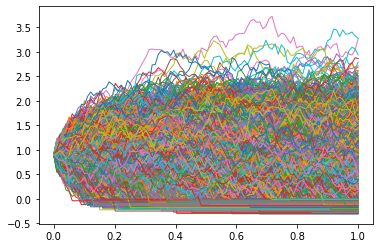

0.3946


In [68]:
sigma = 1.0
kappa = 1.0
theta = 0.5
dt = 0.01
x_0 = 0.9
n_sim = 5000

ou, pds = ou_sim_stopping(kappa = kappa, theta = theta, sigma = sigma, dt = dt, x_0 = x_0, 
                         n_sim = n_sim, stopping = 0.0)
print(pds)

In [1]:
# prob_list_ex = []

# for start in tqdm(np.linspace(0.0, 1.0, 101)):
    
#     sigma = 0.5
#     kappa = 0.3
#     theta = 0.7
#     mu_jump = 0.0
#     sigma_jump = 0.5
#     rate = 1.0
#     dt = 0.01
#     x_0 = start
#     n_sim = 5000
#     stopping = 0.0

#     ou, prob = ou_sim_stopping(kappa = kappa, theta = theta, sigma = sigma, dt = dt, x_0 = x_0, 
#                          n_sim = n_sim, stopping = 0.0)
    
#     prob_list_ex.append(prob)
    

#     print(prob)

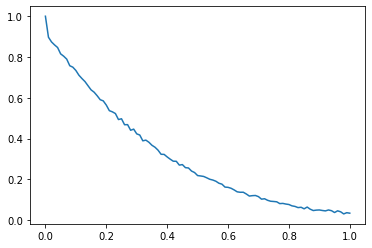

In [10]:
plt.plot(np.linspace(0.0, 1.0, 101), prob_list_ex)

# 2. Jump OU process simulation

In [5]:
def normal_generator(mu_jump, sigma_jump, num_events):
    return np.random.normal(mu_jump, sigma_jump, num_events)

def compound_poisson_process(rate, dt, mu_jump, sigma_jump):
    num_events = np.random.poisson(rate*dt, size = 1)
    jumps = normal_generator(mu_jump = mu_jump, sigma_jump = sigma_jump, num_events = num_events)
    
    jump = jumps.sum()

    if len(jumps) == 0:
        jump = 0
        
    return jump

#mu_jump = 0.0
#sigma_jump = 1.0
#num_events_simulated = 50

#x = compound_poisson_process(10, 0.1, mu_jump, sigma_jump)
#plt.title("Sample Compound Poisson Process (Binomial)")
#plt.xlabel("time")
#plt.ylabel("events")
#plt.legend()

In [6]:
def ou_jump_sim_stopping(kappa, theta, sigma, mu_jump, sigma_jump, rate, dt, x_0, n_sim, stopping):
    
    T = 1.  # Total time.
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros(n)
    x[0] = x_0
    x_origin = x
    x_list = list()
    ruin_count = 0
    
    for j in range(n_sim):
        
        for i in range(n - 1):
            
            stopping_factor = 0.0 if ((isinstance(stopping, float)) and (x[i] <= stopping)) else 1.0
            
            jump = compound_poisson_process(rate, dt, mu_jump, sigma_jump)
            #print(jump)
            
            x[i + 1] = x[i] + stopping_factor*(drift(x[i], kappa=kappa, theta=theta)*dt + diff(x[i], sigma = sigma)*np.sqrt(dt)*np.random.randn() \
                            + jump)
            

        #plt.plot(t, x, lw=1)
        x_list.append(x.copy())
        
        x = x_origin
        
        if stopping_factor == 0.0:
                ruin_count += 1
        
        stopping_factor = 1.0
        
    ruin_prob = ruin_count / n_sim    
    #plt.show()
    
    return x_list, ruin_prob

   

## 2a. Monte Carlo ruin probability estimations - Levy Jump OU

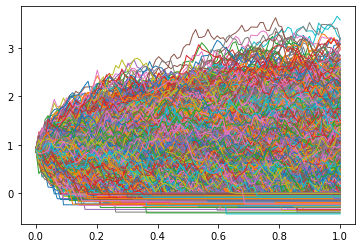

0.4526


In [11]:
sigma = 1.0 
kappa = 0.5 
theta = 0.1
mu_jump = 0.0
sigma_jump = 0.2
rate = 1.0
dt = 0.01
x_0 = 0.9
n_sim = 5000
stopping = 0.0

ou, prob = ou_jump_sim_stopping(kappa = kappa, theta = theta, sigma = sigma, mu_jump = mu_jump, sigma_jump = sigma_jump, rate = rate, 
                 dt = dt, x_0 = x_0, n_sim = n_sim, stopping = stopping)
print(prob)

In [2]:
# prob_list_ex = []

# for start in tqdm(np.linspace(0.0, 1.0, 101)):
    
#     sigma = 0.5
#     kappa = 0.3
#     theta = 0.7
#     mu_jump = 0.0
#     sigma_jump = 0.5
#     rate = 1.0
#     dt = 0.01
#     x_0 = start
#     n_sim = 5000
#     stopping = 0.0

#     ou, prob = ou_jump_sim_stopping(kappa = kappa, theta = theta, sigma = sigma, mu_jump = mu_jump, sigma_jump = sigma_jump, rate = rate, 
#                      dt = dt, x_0 = x_0, n_sim = n_sim, stopping = stopping)
    
#     prob_list_ex.append(prob)
    

#     print(prob)

In [5]:
#plt.plot(np.linspace(0.0, 1.0, 101), prob_list_ex)

# 2. Neural network ruin probability estimations - Continuous OU

In [3]:
import tensorflow as tf

In [4]:
import random

In [5]:
from tqdm.notebook import tqdm

In [10]:
def g_func(path, stopping):
    
    T = 1.  # Total time.
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)
    
    #path, ruin = ou_sim_2(kappa, theta, sigma, dt, x_0, 1, stopping)
    
    g = tf.constant(1.0) if (tf.math.reduce_any(path <= 0)) else tf.constant(0.0)
    
    return g
    

In [28]:
# Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)

# Set constants
#kappa = 1.0
#theta = 0.5
#sigma = 1.0
dt = 0.001

# Set boundary
xmin = -10.0
xmax = 10.0

# Bounds for initial position
lb_x_0 = tf.constant([xmin], dtype=DTYPE)
ub_x_0 = tf.constant([xmax], dtype=DTYPE)

# Bounds for parameters
lb_params = tf.constant([0.0], dtype=DTYPE)
ub_params = tf.constant([5.0], dtype=DTYPE)

# Set random seed for reproducible results
tf.random.set_seed(100)

N_sim = 50000
    
## Draw random initial positions 
X_0_data = tf.random.uniform((N_sim,1), lb_x_0, ub_x_0, dtype=DTYPE)

## Draw random kappa parameters
kappa_data = tf.random.uniform((N_sim,1), lb_params, ub_params, dtype=DTYPE)

## Draw random theta parameters
theta_data = tf.random.uniform((N_sim,1), lb_params, ub_params, dtype=DTYPE)

## Draw random sigma parameters 
sigma_data = tf.random.uniform((N_sim,1), lb_params, ub_params, dtype=DTYPE)

## Concatenate all parameters that will constitute model input
process_data = tf.concat([X_0_data, kappa_data, theta_data,
                         sigma_data], axis=1)


## Simulate path for combinations of the process parameters

path_data_not_tf = []

for i in tqdm(range(N_sim)):

    kappa = kappa_data[i].numpy()
    theta = theta_data[i].numpy()
    sigma = sigma_data[i].numpy()
    
    path_data, ruin = ou_sim_stopping(kappa = kappa, theta = theta, sigma = sigma, dt = dt, x_0 = X_0_data[i],
                                      n_sim = 1, stopping = 0.0)


    path_data_not_tf.append(path_data.copy())

## Make the paths a tensor for compatability with the NN architecture    
path_data_list = tf.stack(path_data_not_tf)   

  0%|          | 0/50000 [00:00<?, ?it/s]

In [29]:
# Neural network parameters
num_hidden_layers = 2
num_neurons_per_layer = 10

# Initializing the feedforwad neural network
model = tf.keras.Sequential()

# Input is 4-dimensional (initial pos, kappa, theta and sigma)
model.add(tf.keras.Input(4))

# Scaling layer to map input to [lb, ub]
#scaling_layer = tf.keras.layers.Lambda(lambda x:
#                                       2.0*(x-lb)/(ub-lb)-1.0)
#model.add(scaling_layer)

In [30]:
# Append hidden layers 
for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons_per_layer,
            activation=tf.keras.activations.get('sigmoid'),
            kernel_initializer='glorot_uniform'))

In [31]:
# Output is one-dimensional
model.add(tf.keras.layers.Dense(1))

In [32]:
# if without scaling run loss function with this inpus
#X_0_data[0:1]

In [33]:
# Compute loss functon.
# loss is sum of 

def loss_function(model, process_data, path_data_list):
    
    loss = 0.0
    
    for i in range(len(process_data)):
        
        path_values = path_data_list[i]
        
        g = g_func(path = path_values, stopping = 0.0)
        #print(g)
        pred = model(process_data[i:(i+1)])
        #print(pred)
        loss += tf.square(g - pred)
    
    loss_value = loss / len(process_data)
    
    return loss_value    
    

In [34]:
# The next function computes the gradient of the loss function

def grad(model, process_data, path_data_list):
    
    with tf.GradientTape(persistent=True) as tape:
        # This tape is for derivatives with
        # respect to trainable variables
        tape.watch(model.trainable_variables)
        loss_value = loss_function(model, process_data, path_data_list)
    
    grad = tape.gradient(loss_value, model.trainable_variables)
        
    del tape
    
    return loss_value, grad

In [35]:
# We choose a piecewise decay of the learning rate, i.e., the
# step size in the gradient descent type algorithm
# the first 1000 steps use a learning rate of 0.01
# from 1000 - 3000: learning rate = 0.001
# from 3000 onwards: learning rate = 0.0005

lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([2000,4000,6000],[1e-1,1e-2,1e-3,1e-4])

# Choose the optimizer
optim = tf.keras.optimizers.Adam(learning_rate=lr)

In [36]:
from time import time

# Define one training step as a TensorFlow function to increase speed of training
@tf.function
def train_step():
    # Compute current loss and gradient w.r.t. parameters
    loss, grad_theta = grad(model, process_data, path_data_list)
    
    # Perform gradient descent step
    optim.apply_gradients(zip(grad_theta, model.trainable_variables))
    
    return loss

In [37]:
# Number of training epochs
N = 1000
hist = []

# Start timer
t0 = time()

for i in tqdm(range(N+1)):
    
    loss = train_step()
    
    # Append current loss to hist
    hist.append(loss.numpy())
    
    # Output current loss after 50 iterates
    if i%100 == 0:
        print('It{}: loss = {}'.format(i,loss))
        
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))

  0%|          | 0/1001 [00:00<?, ?it/s]

It0: loss = [[0.42356512]]
It100: loss = [[0.05589587]]
It200: loss = [[0.05005068]]
It300: loss = [[0.04816714]]
It400: loss = [[0.04745551]]
It500: loss = [[0.04673826]]
It600: loss = [[0.04570873]]
It700: loss = [[0.0452542]]
It800: loss = [[0.04504054]]
It900: loss = [[0.04489569]]
It1000: loss = [[0.04478372]]

Computation time: 60121.498769283295 seconds


In [6]:
#model.save('NN_cont_family')

In [22]:
kappa = 1.0
theta = 0.5
sigma = 1.0
dt = 0.01

In [23]:
trial = tf.constant([[0.9, kappa, theta, sigma]])

In [26]:
upred_trial = model(trial)
upred_trial

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.41251045]], dtype=float32)>

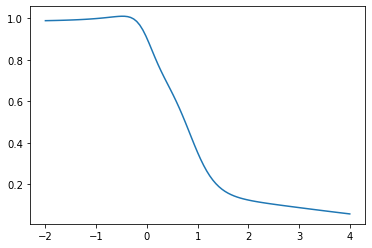

In [27]:
u = list()

for x_0 in np.linspace(-2.0,4.0,101):
    trial = tf.constant([[x_0, kappa, theta, sigma]])
    upred_trial = model(trial)
    u.append(upred_trial)
    
u_nump = [i.numpy()[0][0] for i in u]
plt.plot(np.linspace(-2.0,4.0,101), u_nump)

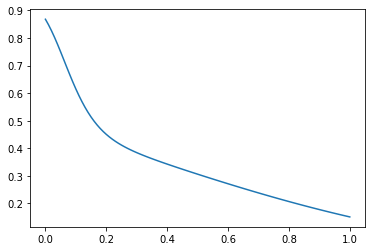

In [46]:
u = list()

for x_0 in np.linspace(0.0,1.0,101):
    trial = tf.constant([[x_0, 0.5, 0.5, 0.5]])
    upred_trial = model(trial)
    u.append(upred_trial)
    
u_nump = [i.numpy()[0][0] for i in u]
plt.plot(np.linspace(0.0,1.0,101), u_nump)

In [130]:
# from mpl_toolkits.mplot3d import Axes3D

# # Set up meshgrid
# N = 600
# tspace = np.linspace(lb[0], ub[0], N + 1)
# xspace = np.linspace(lb[1], ub[1], N + 1)
# T, X = np.meshgrid(tspace, xspace)
# Xgrid = np.vstack([T.flatten(),X.flatten()]).T

# # Determine predictions of u(t, x)
# upred = model(tf.cast(Xgrid,DTYPE))

# # Reshape upred
# U = upred.numpy().reshape(N+1,N+1)

# # Surface plot of solution u(t,x)
# fig = plt.figure(figsize=(9,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(T, X, U, cmap='viridis');
# ax.view_init(35,35)
# ax.set_xlabel('$t$')
# ax.set_ylabel('$x$')
# ax.set_zlabel('$u_\\theta(t,x)$')
# ax.set_title('Solution of PDE');
# #plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

In [131]:
#np.array(hist).reshape(5001,)

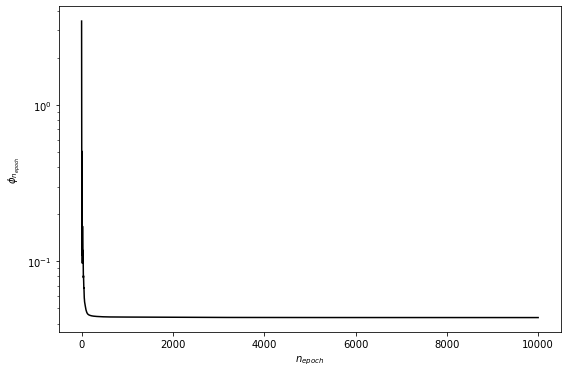

In [129]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(np.array(hist).reshape(10001,))), np.array(hist).reshape(10001,),'k-')
ax.set_xlabel('$n_{epoch}$')
ax.set_ylabel('$\\phi_{n_{epoch}}$');

# 3. Neural network ruin probability estimations - Levy Jump OU 

In [11]:
# Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)

# Set constants
#kappa = 1.0
#theta = 0.5
#sigma = 1.0
mu_jump = 0.0
sigma_jump = 0.2
rate = 1.0
dt = 0.001

# Set boundary
xmin = -10.0
xmax = 10.0

# Bounds for initial position
lb_x_0 = tf.constant([xmin], dtype=DTYPE)
ub_x_0 = tf.constant([xmax], dtype=DTYPE)

# Bounds for parameters
lb_params = tf.constant([0.0], dtype=DTYPE)
ub_params = tf.constant([5.0], dtype=DTYPE)

# Set random seed for reproducible results
tf.random.set_seed(100)

N_sim = 30000
    
## Draw random initial positions 
X_0_data = tf.random.uniform((N_sim,1), lb_x_0, ub_x_0, dtype=DTYPE)

## Draw random kappa parameters
kappa_data = tf.random.uniform((N_sim,1), lb_params, ub_params, dtype=DTYPE)

## Draw random theta parameters
theta_data = tf.random.uniform((N_sim,1), lb_params, ub_params, dtype=DTYPE)

## Draw random sigma parameters 
sigma_data = tf.random.uniform((N_sim,1), lb_params, ub_params, dtype=DTYPE)

## Concatenate all parameters that will constitute model input
process_data = tf.concat([X_0_data, kappa_data, theta_data,
                         sigma_data], axis=1)


## Simulate path for combinations of the process parameters

path_data_not_tf = []

for i in tqdm(range(len(X_0_data))):
    
    path_data, ruin =  ou_jump_sim_stopping(kappa = kappa_data[i], theta = theta_data[i], sigma = sigma_data[i], mu_jump = mu_jump, sigma_jump = sigma_jump, rate = rate, 
                 dt = dt, x_0 = X_0_data[i], n_sim = 1, stopping = 0.0)
    
    
    path_data_not_tf.append(path_data.copy())
    
## Make the paths a tensor for compatability with the NN architecture    
path_data_list = tf.stack(path_data_not_tf)   

  0%|          | 0/30000 [00:00<?, ?it/s]

In [12]:
# Neural network parameters
num_hidden_layers = 3
num_neurons_per_layer = 7

# Initializing the feedforwad neural network
model_jump = tf.keras.Sequential()

# Input is 4-dimensional (initial pos, kappa, theta and sigma)
model_jump.add(tf.keras.Input(4))

# Scaling layer to map input to [lb, ub]
#scaling_layer = tf.keras.layers.Lambda(lambda x:
#                                       2.0*(x-lb)/(ub-lb)-1.0)
#model.add(scaling_layer)

# Append hidden layers 
for _ in range(num_hidden_layers):
        model_jump.add(tf.keras.layers.Dense(num_neurons_per_layer,
            activation=tf.keras.activations.get('softplus'),
            kernel_initializer='glorot_uniform'))
        
# Output is one-dimensional
model_jump.add(tf.keras.layers.Dense(1))

In [13]:
# Compute loss functon.
# loss is sum of 

def loss_function(model_jump, process_data, path_data_list):
    
    loss = 0.0
    
    for i in range(len(process_data)):
        
        path_values = path_data_list[i]
        
        g = g_func(path = path_values, stopping = 0.0)
        #print(g)
        pred = model_jump(process_data[i:(i+1)])
        #print(pred)
        loss += tf.square(g - pred)
    
    loss_value = loss / len(process_data)
    
    return loss_value    
    

In [14]:
# The next function computes the gradient of the loss function

def grad(model_jump, process_data, path_data_list):
    
    with tf.GradientTape(persistent=True) as tape:
        # This tape is for derivatives with
        # respect to trainable variables
        tape.watch(model_jump.trainable_variables)
        loss_value = loss_function(model_jump, process_data, path_data_list)
    
    grad = tape.gradient(loss_value, model_jump.trainable_variables)
        
    del tape
    
    return loss_value, grad

In [15]:
# We choose a piecewise decay of the learning rate, i.e., the
# step size in the gradient descent type algorithm
# the first 1000 steps use a learning rate of 0.01
# from 1000 - 3000: learning rate = 0.001
# from 3000 onwards: learning rate = 0.0005

lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([2000,4000,6000],[1e-1,1e-2,1e-3,1e-4])

# Choose the optimizer
optim = tf.keras.optimizers.Adam(learning_rate=lr)

In [16]:
from time import time

# Define one training step as a TensorFlow function to increase speed of training
@tf.function
def train_step():
    # Compute current loss and gradient w.r.t. parameters
    loss, grad_theta = grad(model_jump, process_data, path_data_list)
    
    # Perform gradient descent step
    optim.apply_gradients(zip(grad_theta, model_jump.trainable_variables))
    
    return loss

In [17]:
# Number of training epochs
N = 10000
hist = []

# Start timer
t0 = time()

for i in tqdm(range(N+1)):
    
    loss = train_step()
    
    # Append current loss to hist
    hist.append(loss.numpy())
    
    # Output current loss after 50 iterates
    if i%100 == 0:
        print('It{}: loss = {}'.format(i,loss))
        
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))

  0%|          | 0/10001 [00:00<?, ?it/s]

It0: loss = [[1.5652388]]
It100: loss = [[0.07003015]]
It200: loss = [[0.05086138]]
It300: loss = [[0.07425343]]
It400: loss = [[0.07138203]]
It500: loss = [[0.05468168]]
It600: loss = [[0.05501032]]
It700: loss = [[0.04980722]]
It800: loss = [[0.07143217]]
It900: loss = [[0.04992091]]
It1000: loss = [[0.0497114]]
It1100: loss = [[0.05023254]]
It1200: loss = [[0.05256121]]
It1300: loss = [[0.04939747]]
It1400: loss = [[0.04877508]]
It1500: loss = [[0.04850356]]
It1600: loss = [[0.04762679]]
It1700: loss = [[0.046679]]
It1800: loss = [[0.04649388]]
It1900: loss = [[0.04632727]]
It2000: loss = [[0.04628431]]
It2100: loss = [[0.04626577]]
It2200: loss = [[0.04625287]]
It2300: loss = [[0.04623978]]
It2400: loss = [[0.04622633]]
It2500: loss = [[0.04621235]]
It2600: loss = [[0.04619799]]
It2700: loss = [[0.04618319]]
It2800: loss = [[0.04616776]]
It2900: loss = [[0.04615194]]
It3000: loss = [[0.04613566]]
It3100: loss = [[0.04611889]]
It3200: loss = [[0.04610162]]
It3300: loss = [[0.0460837

In [7]:
#model_jump.save('NN_jump_family')

In [8]:
#model_jump =  tf.keras.models.load_model('NN_jump_family')

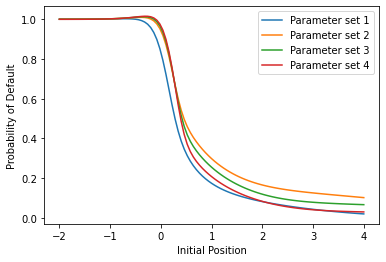

In [8]:
kappa = np.array([0.5, 2.0, 3.0, 4.0])
theta = np.array([0.5, 2.0, 3.0, 4.0])
sigma = np.array([0.5, 2.0, 3.0, 4.0])
# dt = 0.01

u_paths = list()

for i in range(len(kappa)):
    u = list()
    for x_0 in np.linspace(-2.0,4.0,101):
        trial = tf.constant([[x_0, kappa[i], theta[i], sigma[i]]])
        upred_trial = model_jump(trial)
        u.append(upred_trial.numpy()[0][0])
    u_paths.append(u)

for i in range(len(u_paths)):        
    plt.plot(np.linspace(-2.0,4.0,101), u_paths[i], label='Parameter set %s' % (i+1))

plt.xlabel("Initial Position")    
plt.ylabel("Probability of Default")
plt.legend()
plt.show()

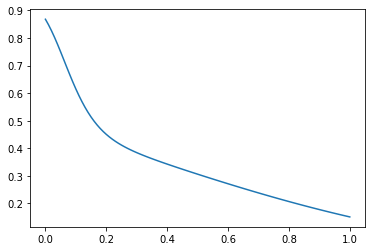

In [46]:
u = list()

for x_0 in np.linspace(0.0,1.0,101):
    trial = tf.constant([[x_0, 0.5, 0.5, 0.5]])
    upred_trial = model(trial)
    u.append(upred_trial)
    
u_nump = [i.numpy()[0][0] for i in u]
plt.plot(np.linspace(0.0,1.0,101), u_nump)